# Transfer Learning CIFAR10

In [28]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


* Train a simple convnet on the CIFAR dataset the first 5 output classes [0..4].
* Freeze convolutional layers and fine-tune dense layers for the last 5 ouput classes [5..9].


### 1. Import CIFAR10 data and create 2 datasets with one dataset having classes from 0 to 4 and other having classes from 5 to 9 

In [0]:
# Initialize the random number generator
import random
random.seed(0)

import warnings
warnings.filterwarnings("ignore")

In [0]:
from keras.backend import backend
from keras.datasets import cifar10

# the data, shuffled and split between train and test sets
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

Label: [9]


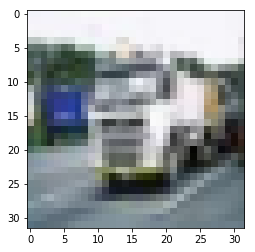

In [147]:
import matplotlib.pyplot as plt
%matplotlib inline
print("Label: {}".format(y_train[1000]))
plt.imshow(X_train[1000], cmap='gray')

In [0]:
import numpy as np

x_train04 , y_train04 = X_train[np.where(y_train <=4)[0]], y_train[y_train<=4] 
x_test04 , y_test04 = X_test[np.where(y_test <=4)[0]], y_test[y_test<=4]

x_train59 , y_train59 = X_train[np.where(y_train >4)[0]], y_train[y_train>4] 
x_test59 , y_test59 = X_test[np.where(y_test >4)[0]], y_test[y_test>4]

### 2. Use One-hot encoding to divide y_train and y_test into required no of output classes

In [0]:
x_train04 = x_train04.reshape(x_train04.shape[0], 32, 32, 3).astype('float32')
x_test04 = x_test04.reshape(x_test04.shape[0], 32, 32, 3).astype('float32')

In [0]:
x_train04 /= 255
x_test04 /= 255

In [151]:
x_train04.shape

(25000, 32, 32, 3)

In [152]:
x_test04.shape

(5000, 32, 32, 3)

In [0]:
from keras.utils import np_utils

y_train04 = np_utils.to_categorical(y_train04, 5)
y_test04 = np_utils.to_categorical(y_test04, 5)

### 3. Build a sequential neural network model which can classify the classes 0 to 4 of CIFAR10 dataset with at least 80% accuracy on test data

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Reshape
from keras.layers import Convolution2D, MaxPooling2D , BatchNormalization
from keras.regularizers import l2


In [0]:
BATCH_SIZE = 128
EPOCHS = 30

In [0]:
 # Define Model
    model = Sequential()

    # 1st Conv Layer
    model.add(Convolution2D(32, 3, 3, input_shape=(32, 32, 3)))
    model.add(Activation('relu'))

    # 2nd Conv Layer
    model.add(Convolution2D(256, 3, 3))
    model.add(Activation('relu'))

    # Max Pooling
    model.add(MaxPooling2D(pool_size=(2,2)))
    
    # Dropout
    model.add(Dropout(0.2))
    model.add(BatchNormalization())
    
    # 3nd Conv Layer
    model.add(Convolution2D(128, 3, 3))
    model.add(Activation('relu'))
    
    model.add(Dropout(0.2))
    model.add(BatchNormalization())

   # Fully Connected Layer

In [0]:
model.add(Flatten())
#model.add(Dense(128, input_dim=64, W_regularizer=l2(0.01)))
model.add(Dense(256))
model.add(Activation('relu'))

 
    # More Dropout
model.add(Dropout(0.4))
model.add(BatchNormalization())


    # Prediction Layer
model.add(Dense(5))
model.add(Activation('softmax'))

In [0]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [0]:
import keras 

early_stopping = keras.callbacks.EarlyStopping(monitor='val_acc', patience=7, verbose=1, mode='auto')
callback_list = [early_stopping]

In [168]:
model.fit(x_train04, y_train04, batch_size=BATCH_SIZE, nb_epoch=15, 
              validation_data=(x_test04, y_test04), callbacks=callback_list)

Train on 25000 samples, validate on 5000 samples
Epoch 1/15
25000/25000 [==============================] - 18s 731us/step - loss: 1.0358 - acc: 0.6090 - val_loss: 1.0759 - val_acc: 0.5882
Epoch 2/15
25000/25000 [==============================] - 15s 618us/step - loss: 0.6816 - acc: 0.7418 - val_loss: 0.6362 - val_acc: 0.7626
Epoch 3/15
25000/25000 [==============================] - 15s 615us/step - loss: 0.5226 - acc: 0.8035 - val_loss: 0.6041 - val_acc: 0.7714
Epoch 4/15
25000/25000 [==============================] - 15s 616us/step - loss: 0.4224 - acc: 0.8435 - val_loss: 0.5234 - val_acc: 0.8074
Epoch 5/15
25000/25000 [==============================] - 15s 616us/step - loss: 0.3318 - acc: 0.8806 - val_loss: 0.6102 - val_acc: 0.7800
Epoch 6/15
25000/25000 [==============================] - 15s 615us/step - loss: 0.2555 - acc: 0.9105 - val_loss: 0.6398 - val_acc: 0.7956
Epoch 7/15
25000/25000 [==============================] - 15s 616us/step - loss: 0.1948 - acc: 0.9334 - val_loss: 0.5

In [169]:
model.evaluate(x_test04,y_test04)

5000/5000 [==============================] - 2s 301us/step


[0.6041622749805451, 0.8384]

### 4. In the model which was built above (for classification of classes 0-4 in CIFAR10), make only the dense layers to be trainable and conv layers to be non-trainable

In [0]:
#Freezing layers in the model which don't have 'dense' in their name
for layer in model.layers:
  if('dense' not in layer.name): #prefix detection to freeze layers which does not have dense
    #Freezing a layer
    layer.trainable = False

#Module to print colourful statements
from termcolor import colored

#Check which layers have been frozen 

In [171]:
for layer in model.layers:
  print (colored(layer.name, 'blue'),colored(layer.trainable, 'red'))

conv2d_29 False
activation_43 False
conv2d_30 False
activation_44 False
max_pooling2d_13 False
dropout_15 False
batch_normalization_17 False
conv2d_31 False
activation_45 False
dropout_16 False
batch_normalization_18 False
flatten_11 False
dense_15 True
activation_46 False
dropout_17 False
batch_normalization_19 False
dense_16 True
activation_47 False


### 5. Utilize the the model trained on CIFAR 10 (classes 0 to 4) to classify the classes 5 to 9 of CIFAR 10  (Use Transfer Learning) <br>
Achieve an accuracy of more than 85% on test data

In [0]:
y_train59 = np_utils.to_categorical(y_train59-5, 5)
y_test59 = np_utils.to_categorical(y_test59-5, 5)

In [0]:
x_train59 = x_train59.reshape(x_train59.shape[0], 32, 32, 3).astype('float32')
x_test59 = x_test59.reshape(x_test59.shape[0], 32, 32, 3).astype('float32')

In [0]:
x_train59 /=255
x_test59 /=255

In [175]:
print('X_Train shape ',x_train59.shape)
print('number of images in  train ',x_train59.shape[0])
print('number of images in  test ',x_test59.shape[0])

X_Train shape  (25000, 32, 32, 3)
number of images in  train  25000
number of images in  test  5000


In [176]:
print('X_Train shape ',x_train59.shape)
print('number of images in  train ',y_train59.shape[0])
print('number of images in  test ',y_test59.shape[0])

X_Train shape  (25000, 32, 32, 3)
number of images in  train  25000
number of images in  test  5000


In [0]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [178]:
model.fit(x_train59, y_train59, batch_size=BATCH_SIZE, nb_epoch=15, 
              validation_data=(x_test59, y_test59), callbacks=callback_list)

Train on 25000 samples, validate on 5000 samples
Epoch 1/15
25000/25000 [==============================] - 9s 378us/step - loss: 1.4905 - acc: 0.6819 - val_loss: 0.5867 - val_acc: 0.8138
Epoch 2/15
25000/25000 [==============================] - 7s 290us/step - loss: 0.3872 - acc: 0.8667 - val_loss: 0.5062 - val_acc: 0.8346
Epoch 3/15
25000/25000 [==============================] - 7s 290us/step - loss: 0.2587 - acc: 0.9100 - val_loss: 0.5078 - val_acc: 0.8396
Epoch 4/15
25000/25000 [==============================] - 7s 290us/step - loss: 0.1784 - acc: 0.9422 - val_loss: 0.4949 - val_acc: 0.8450
Epoch 5/15
25000/25000 [==============================] - 7s 287us/step - loss: 0.1205 - acc: 0.9606 - val_loss: 0.4738 - val_acc: 0.8564
Epoch 6/15
25000/25000 [==============================] - 7s 291us/step - loss: 0.0904 - acc: 0.9731 - val_loss: 0.5043 - val_acc: 0.8534
Epoch 7/15
25000/25000 [==============================] - 7s 287us/step - loss: 0.0709 - acc: 0.9790 - val_loss: 0.4839 - v

In [179]:
model.evaluate(x_test59,y_test59)

5000/5000 [==============================] - 1s 293us/step


[0.5959680340111255, 0.8666]

# Text classification using TF-IDF

### 6. Load the dataset from sklearn.datasets

In [0]:
from sklearn.datasets import fetch_20newsgroups

In [0]:
categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']

### 7. Training data

In [4]:
twenty_train = fetch_20newsgroups(subset='train', categories=categories, shuffle=True, random_state=42)

### 8. Test data

In [0]:
twenty_test = fetch_20newsgroups(subset='test', categories=categories, shuffle=True, random_state=42)

###  a.  You can access the values for the target variable using .target attribute 
###  b. You can access the name of the class in the target variable with .target_names


In [6]:
twenty_train.target

array([1, 1, 3, ..., 2, 2, 2])

In [7]:
twenty_train.target_names

['alt.atheism', 'comp.graphics', 'sci.med', 'soc.religion.christian']

In [8]:
twenty_train.data[0:5]

['From: sd345@city.ac.uk (Michael Collier)\nSubject: Converting images to HP LaserJet III?\nNntp-Posting-Host: hampton\nOrganization: The City University\nLines: 14\n\nDoes anyone know of a good way (standard PC application/PD utility) to\nconvert tif/img/tga files into LaserJet III format.  We would also like to\ndo the same, converting to HPGL (HP plotter) files.\n\nPlease email any response.\n\nIs this the correct group?\n\nThanks in advance.  Michael.\n-- \nMichael Collier (Programmer)                 The Computer Unit,\nEmail: M.P.Collier@uk.ac.city                The City University,\nTel: 071 477-8000 x3769                      London,\nFax: 071 477-8565                            EC1V 0HB.\n',
 "From: ani@ms.uky.edu (Aniruddha B. Deglurkar)\nSubject: help: Splitting a trimming region along a mesh \nOrganization: University Of Kentucky, Dept. of Math Sciences\nLines: 28\n\n\n\n\tHi,\n\n\tI have a problem, I hope some of the 'gurus' can help me solve.\n\n\tBackground of the probl

### 9.  Now with dependent and independent data available for both train and test datasets, using TfidfVectorizer fit and transform the training data and test data and get the tfidf features for both

In [0]:
import pandas as pd

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [0]:
tfve=TfidfVectorizer(stop_words='english')


In [0]:
Xtr20=tfve.fit_transform(twenty_train.data)

In [0]:

ytr20=twenty_train.target

In [0]:

Xts20=tfve.transform(twenty_test.data)

In [0]:
yts20=twenty_test.target

### 10. Use logisticRegression with tfidf features as input and targets as output and train the model and report the train and test accuracy score

In [0]:
from sklearn.linear_model import LogisticRegression

In [0]:
lR=LogisticRegression()

In [18]:
lR.fit(Xtr20,ytr20)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
ytrprd=lR.predict(Xtr20)

In [0]:
ytsprd=lR.predict(Xts20)

In [0]:
from sklearn.metrics import  accuracy_score

In [26]:
accuracy_score(ytr20,ytrprd)

0.9933540097474524

In [27]:
accuracy_score(yts20,ytsprd)

0.8988015978695073